# Analysis of parameters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from bifurcation import bifurcation_point, draw_bifurcation

## Feedback

Is feedback really important for obtaining a succesful bifurcation?

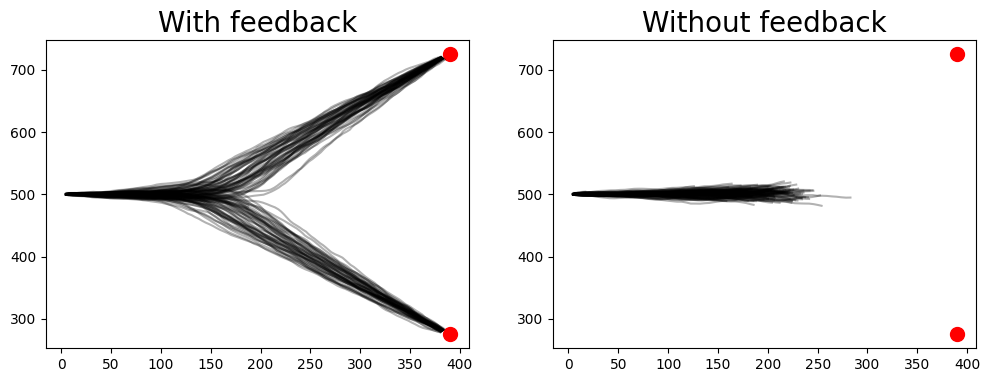

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

#-------------------------------- FEEDBACK --------------------------------

df_cen = pd.read_csv('../output/reproduce/centroid_2_targets.txt', sep='\t')
df_tar = pd.read_csv('../output/reproduce/targets_2_targets.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax1.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax1.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax1.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax1.set_title("With feedback", fontsize=20)

#------------------------------- NO FEEDBACK -------------------------------

df_cen = pd.read_csv('../output/reproduce/centroid_2_targets_nofeedback.txt', sep='\t')
df_tar = pd.read_csv('../output/reproduce/targets_2_targets_nofeedback.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax2.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax2.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax2.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax2.set_title("Without feedback", fontsize=20)

# save figure to pdf file (for publication) good quality
plt.savefig('../img/without_feedback.pdf', format='pdf', dpi=300)

**Without feedback the group is always splitting aftera a certain time**

In "The geometry of decision-making in individuals and collectives", Fig.S19

*However, with no feedback, the group will almost always split into subgroups that all go to their preferred target. Hence, B and D also included uninformed individuals that function to keep the group together.*

---

### Feedback is necessary to obtain the bifurcation, but we can try to tune it through the `angular_tresh` parameter.

# `angular_tresh`

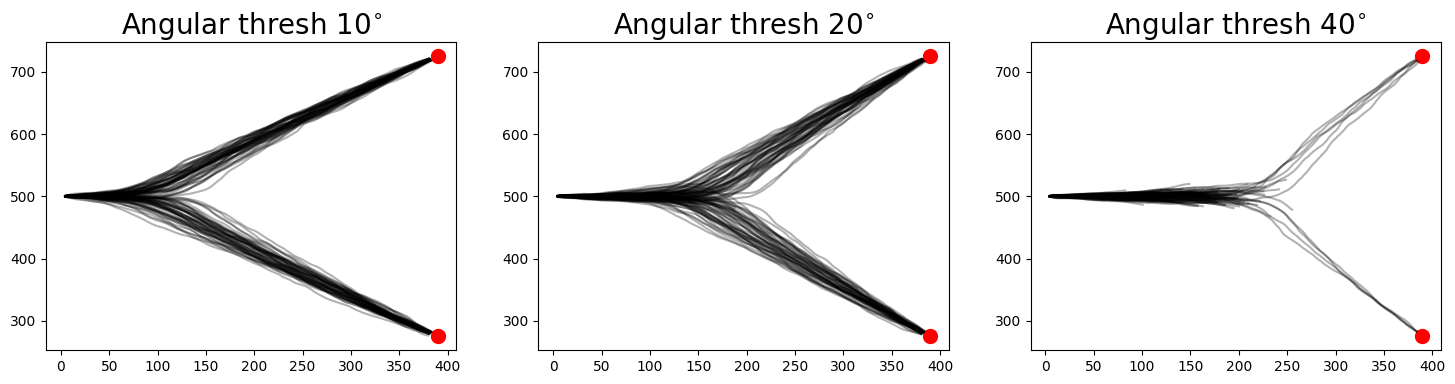

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

#-------------------------------- 10 DEG --------------------------------

df_cen = pd.read_csv('../output/angular_thresh/centroid_10_deg.txt', sep='\t')
df_tar = pd.read_csv('../output/angular_thresh/targets_10_deg.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax1.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax1.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax1.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax1.set_title("Angular thresh 10$^{\circ}$", fontsize=20)

#-------------------------------- 20 DEG --------------------------------

df_cen = pd.read_csv('../output/angular_thresh/centroid_20_deg.txt', sep='\t')
df_tar = pd.read_csv('../output/angular_thresh/targets_20_deg.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax2.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax2.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax2.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax2.set_title("Angular thresh 20$^{\circ}$", fontsize=20)

#-------------------------------- 40 DEG --------------------------------

df_cen = pd.read_csv('../output/angular_thresh/centroid_40_deg.txt', sep='\t')
df_tar = pd.read_csv('../output/angular_thresh/targets_40_deg.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax3.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
    
ax3.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax3.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax3.set_title("Angular thresh 40$^{\circ}$", fontsize=20)
plt.savefig('../img/angular_thresh.pdf', format='pdf', dpi=300)

The bifurcation point is not very clear. What can I do to make each simulation more similar?

I can try to change the `timestep_inc` parameter.

---

# `timestep_inc`

I keep fix `angular_tresh` to 20 degrees.

**Note:** For `timestep_inc=0.04` I increase `num_timesteps` because otherwise the system can't reach the targets.

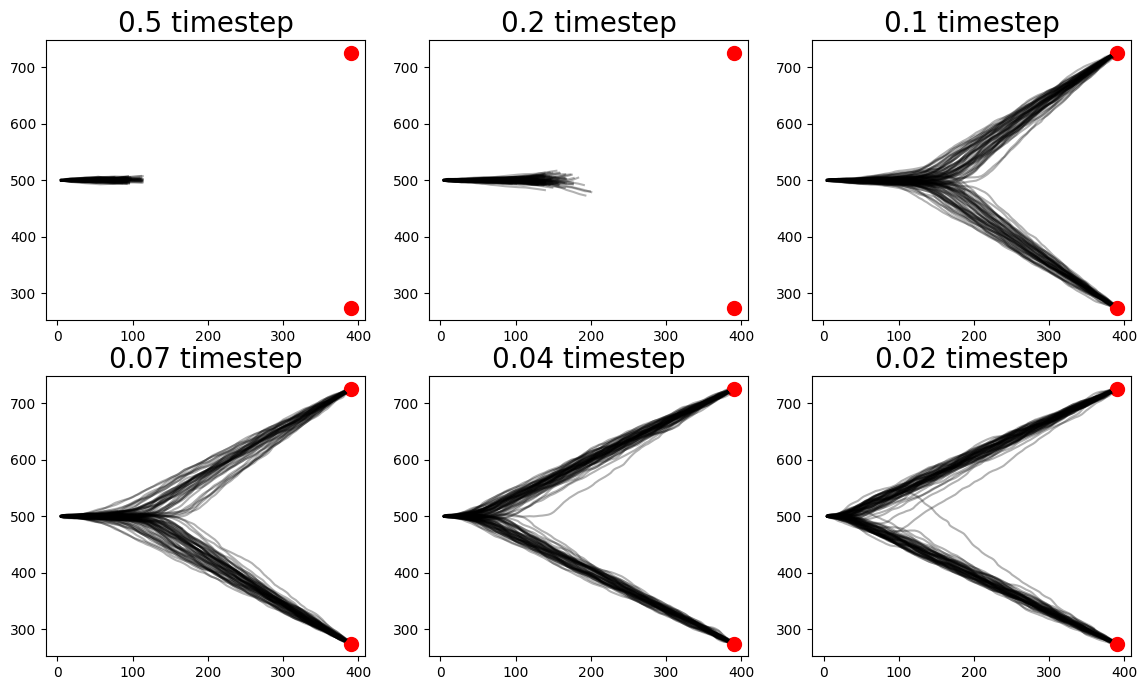

In [4]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(14,8))

#-------------------------------- 0.5 timestep --------------------------------

df_cen = pd.read_csv('../output/timestep_inc/centroid_0,5.txt', sep='\t')
df_tar = pd.read_csv('../output/timestep_inc/targets_0,5.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax1.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax1.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax1.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax1.set_title("0.5 timestep", fontsize=20)

#-------------------------------- 0.2 timestep --------------------------------

df_cen = pd.read_csv('../output/timestep_inc/centroid_0,2.txt', sep='\t')
df_tar = pd.read_csv('../output/timestep_inc/targets_0,2.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax2.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax2.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax2.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax2.set_title("0.2 timestep", fontsize=20)

#-------------------------------- 0.1 timestep --------------------------------

df_cen = pd.read_csv('../output/timestep_inc/centroid_0,1.txt', sep='\t')
df_tar = pd.read_csv('../output/timestep_inc/targets_0,1.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax3.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax3.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax3.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax3.set_title("0.1 timestep", fontsize=20)

#-------------------------------- 0.07 timestep --------------------------------

df_cen = pd.read_csv('../output/timestep_inc/centroid_0,07.txt', sep='\t')
df_tar = pd.read_csv('../output/timestep_inc/targets_0,07.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax4.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax4.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax4.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax4.set_title("0.07 timestep", fontsize=20)

#-------------------------------- 0.04 timestep --------------------------------

df_cen = pd.read_csv('../output/timestep_inc/centroid_0,04.txt', sep='\t')
df_tar = pd.read_csv('../output/timestep_inc/targets_0,04.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax5.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax5.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax5.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax5.set_title("0.04 timestep", fontsize=20)

#-------------------------------- 0.02 timestep --------------------------------

df_cen = pd.read_csv('../output/timestep_inc/centroid_0,02.txt', sep='\t')
df_tar = pd.read_csv('../output/timestep_inc/targets_0,02.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax6.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax6.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax6.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax6.set_title("0.02 timestep", fontsize=20);

---

# `omega_max`

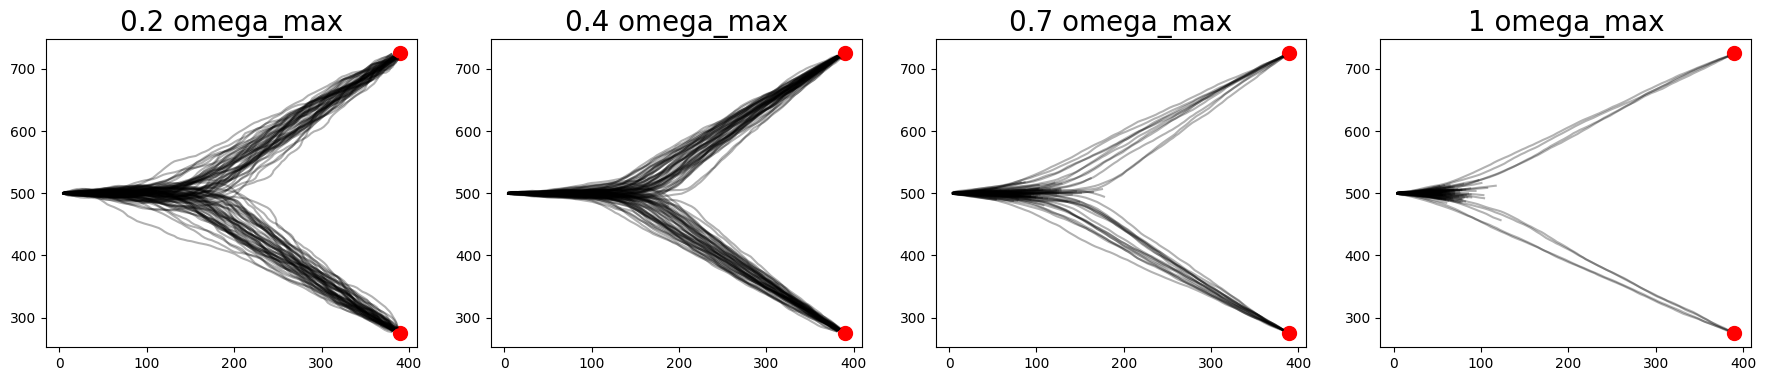

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(22,4))


#-------------------------------- 0.2 omega max --------------------------------

df_cen = pd.read_csv('../output/omega_max/centroid_0,2.txt', sep='\t')
df_tar = pd.read_csv('../output/omega_max/targets_0,2.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax1.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax1.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax1.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax1.set_title("0.2 omega_max", fontsize=20)

#-------------------------------- 0.4 omega max --------------------------------

df_cen = pd.read_csv('../output/omega_max/centroid_0,4.txt', sep='\t')
df_tar = pd.read_csv('../output/omega_max/targets_0,4.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax2.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax2.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax2.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax2.set_title("0.4 omega_max", fontsize=20)

#-------------------------------- 0.7 omega max --------------------------------

df_cen = pd.read_csv('../output/omega_max/centroid_0,7.txt', sep='\t')
df_tar = pd.read_csv('../output/omega_max/targets_0,7.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax3.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax3.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax3.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax3.set_title("0.7 omega_max", fontsize=20)

#-------------------------------- 1 omega max --------------------------------

df_cen = pd.read_csv('../output/omega_max/centroid_1.txt', sep='\t')
df_tar = pd.read_csv('../output/omega_max/targets_1.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax4.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
ax4.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax4.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax4.set_title("1 omega_max", fontsize=20);

---

---

---

## `total_agents`

How to improve accuracy?  I try to run a simulation with 100 agents.

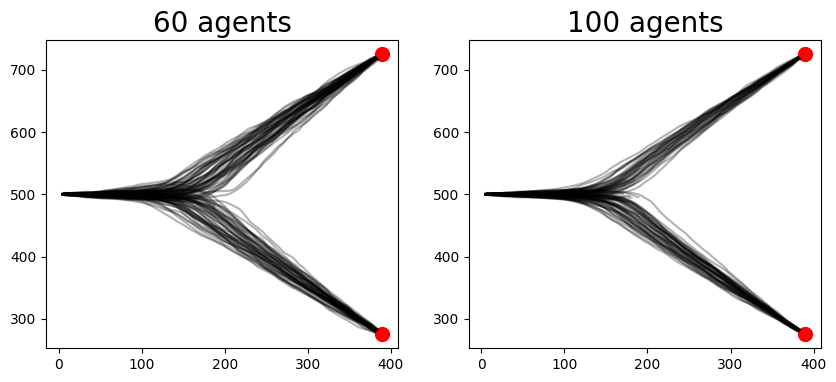

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

#-------------------------------- 60 agents --------------------------------

df_cen = pd.read_csv('../output/reproduce/centroid_2_targets.txt', sep='\t')
df_tar = pd.read_csv('../output/reproduce/targets_2_targets.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax1.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)

ax1.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax1.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax1.set_title("60 agents", fontsize=20)

#-------------------------------- 100 agents --------------------------------

df_cen = pd.read_csv('../output/reproduce/centroid_2_targets_100agents.txt', sep='\t')
df_tar = pd.read_csv('../output/reproduce/targets_2_targets_100agents.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax2.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)

ax2.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax2.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax2.set_title("100 agents", fontsize=20);

## `num_replicates`

It is not really better. I try to increment `num_replicates`

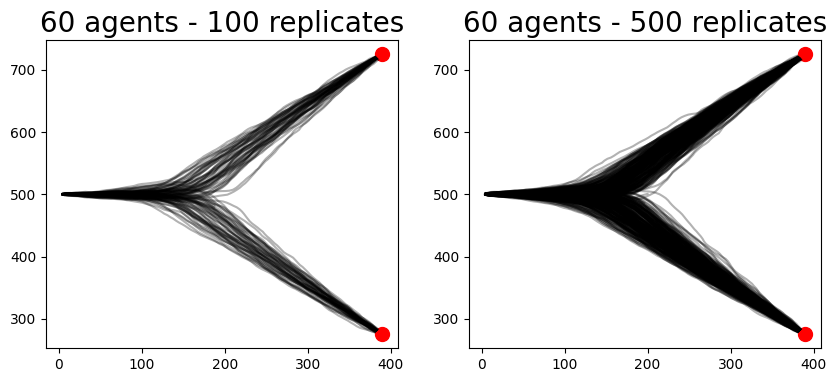

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

#-------------------------------- 60 agents --------------------------------

df_cen = pd.read_csv('../output/reproduce/centroid_2_targets.txt', sep='\t')
df_tar = pd.read_csv('../output/reproduce/targets_2_targets.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax1.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)

ax1.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax1.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax1.set_title("60 agents - 100 replicates", fontsize=20)

#-------------------------------- 100 agents --------------------------------

df_cen = pd.read_csv('../output/reproduce/centroid_2_targets_500rep.txt', sep='\t')
df_tar = pd.read_csv('../output/reproduce/targets_2_targets_500rep.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax2.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)

ax2.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax2.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax2.set_title("60 agents - 500 replicates", fontsize=20);

---
---
---

## `beta`

In some simulations the group split and we don't like that. I try to increase the term that tune attraction and allignment (`beta`).

For the following plot I used `angular_tresh=40deg` 

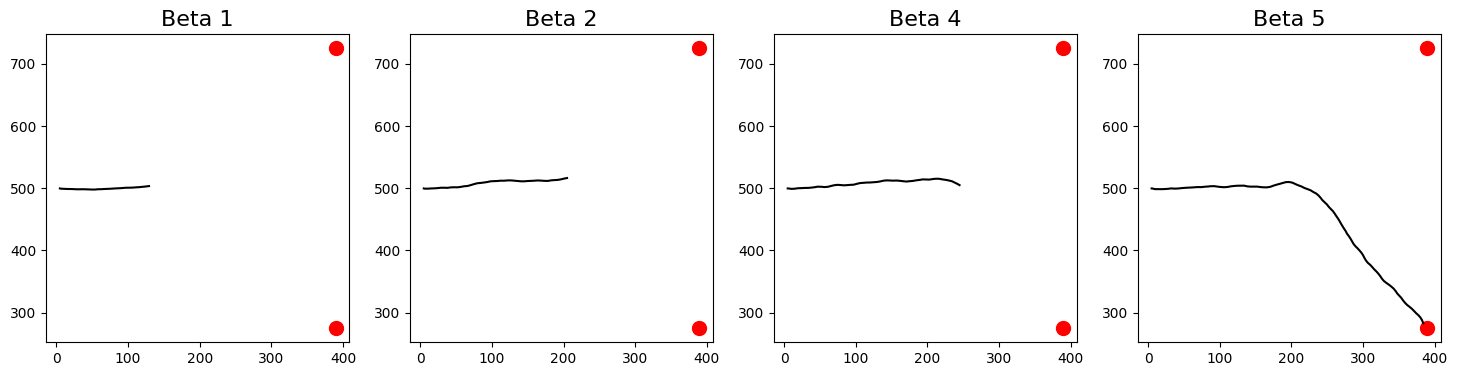

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18,4))

#-------------------------------- 1 BETA --------------------------------

df_cen = pd.read_csv('../output/beta_check/centroid_40deg_1b_det.txt', sep='\t')
df_tar = pd.read_csv('../output/beta_check/targets_40deg_1b_det.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax1.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=1)
    
ax1.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax1.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax1.set_title("Beta 1", fontsize=16)

#-------------------------------- 2 BETA --------------------------------

df_cen = pd.read_csv('../output/beta_check/centroid_40deg_2b_det.txt', sep='\t')
df_tar = pd.read_csv('../output/beta_check/targets_40deg_2b_det.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax2.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=1)
    
ax2.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax2.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax2.set_title("Beta 2", fontsize=16)

#-------------------------------- 4 BETA --------------------------------

df_cen = pd.read_csv('../output/beta_check/centroid_40deg_4b_det.txt', sep='\t')
df_tar = pd.read_csv('../output/beta_check/targets_40deg_4b_det.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax3.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=1)
    
ax3.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax3.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax3.set_title("Beta 4", fontsize=16)

#-------------------------------- 5 BETA --------------------------------

df_cen = pd.read_csv('../output/beta_check/centroid_40deg_5b_det.txt', sep='\t')
df_tar = pd.read_csv('../output/beta_check/targets_40deg_5b_det.txt', sep='\t')

for i in range(df_cen.replicate.max()+1):
    ax4.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=1)
    
ax4.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax4.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax4.set_title("Beta 5", fontsize=16)
plt.savefig('../img/beta.pdf', format='pdf', dpi=300)

### The parameter `beta` can avoid the group to split but it is important to be sure that it doesn't affect the trajectory and pattern of the simulation without it.
I run a simulation with the model without `beta` until I have n trajectories that reach the target. And I do the same for the model with `beta` in order to compare them.

74


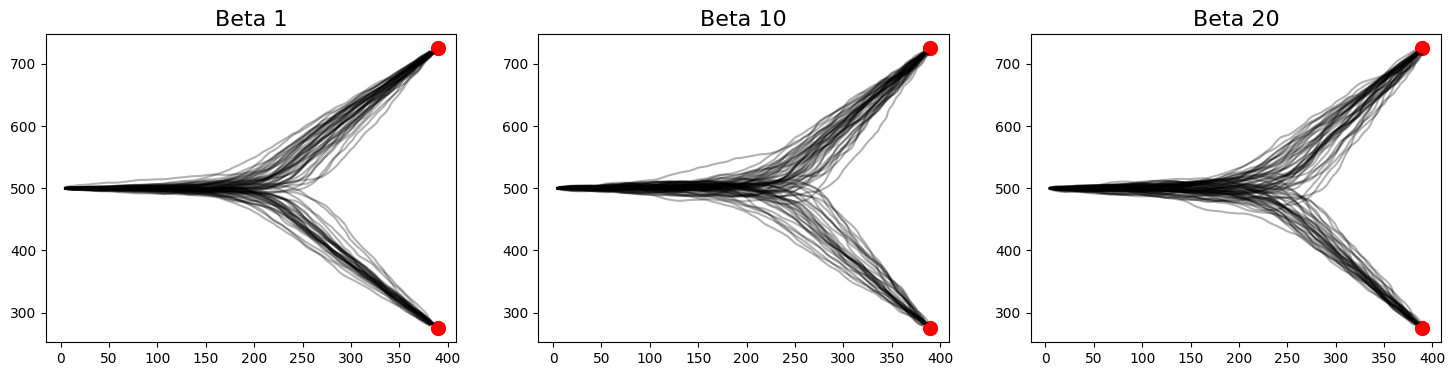

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

#-------------------------------- 1 BETA --------------------------------

df_cen1 = pd.read_csv('../output/beta/centroid_40deg_1b.txt', sep='\t')
df_tar1 = pd.read_csv('../output/beta/targets_40deg_1b.txt', sep='\t')
reached = df_cen1[df_cen1['cue_reached']!=-1].replicate
num = len(df_cen1[df_cen1['cue_reached']!=-1])
print(num)
df_cen1 = df_cen1[df_cen1.replicate.isin(reached)]

for i in range(df_cen1.replicate.max()+1):
    ax1.plot(df_cen1.loc[df_cen1.replicate==i,:].x, df_cen1.loc[df_cen1.replicate==i,:].y, c='black', alpha=0.3)
    
ax1.scatter(df_tar1.loc[df_tar1.id==0,:].x, df_tar1.loc[df_tar1.id==0,:].y, c='r', s=100)
ax1.scatter(df_tar1.loc[df_tar1.id==1,:].x, df_tar1.loc[df_tar1.id==1,:].y, c='r', s=100)
ax1.set_title("Beta 1", fontsize=16)

#-------------------------------- 10 BETA --------------------------------

df_cen2 = pd.read_csv('../output/beta/centroid_40deg_10b.txt', sep='\t')
df_tar2 = pd.read_csv('../output/beta/targets_40deg_10b.txt', sep='\t')
reached = df_cen2[df_cen2['cue_reached']!=-1].replicate.head(num+1)
df_cen2 = df_cen2[df_cen2.replicate.isin(reached)]

for i in range(df_cen2.replicate.max()+1):
    ax2.plot(df_cen2.loc[df_cen2.replicate==i,:].x, df_cen2.loc[df_cen2.replicate==i,:].y, c='black', alpha=0.3)
    
ax2.scatter(df_tar2.loc[df_tar2.id==0,:].x, df_tar2.loc[df_tar2.id==0,:].y, c='r', s=100)
ax2.scatter(df_tar2.loc[df_tar2.id==1,:].x, df_tar2.loc[df_tar2.id==1,:].y, c='r', s=100)
ax2.set_title("Beta 10", fontsize=16)
             
#-------------------------------- 20 BETA --------------------------------

df_cen3 = pd.read_csv('../output/beta/centroid_40deg_20b.txt', sep='\t')
df_tar3 = pd.read_csv('../output/beta/targets_40deg_20b.txt', sep='\t')
reached = df_cen3[df_cen3['cue_reached']!=-1].replicate.head(num+1)
df_cen3 = df_cen3[df_cen3.replicate.isin(reached)]

for i in range(df_cen3.replicate.max()+1):
    ax3.plot(df_cen3.loc[df_cen3.replicate==i,:].x, df_cen3.loc[df_cen3.replicate==i,:].y, c='black', alpha=0.3)
    
ax3.scatter(df_tar3.loc[df_tar3.id==0,:].x, df_tar3.loc[df_tar3.id==0,:].y, c='r', s=100)
ax3.scatter(df_tar3.loc[df_tar3.id==1,:].x, df_tar3.loc[df_tar3.id==1,:].y, c='r', s=100)
ax3.set_title("Beta 20", fontsize=16)
plt.savefig('../img/beta_mul.pdf', format='pdf', dpi=300)

I can now calculate the bifurcation point

In [10]:
print(bifurcation_point(df_cen1))
print(bifurcation_point(df_cen2))
print(bifurcation_point(df_cen3))

191.51399070168833
233.19613604011562
233.0795910128333


---
---
---

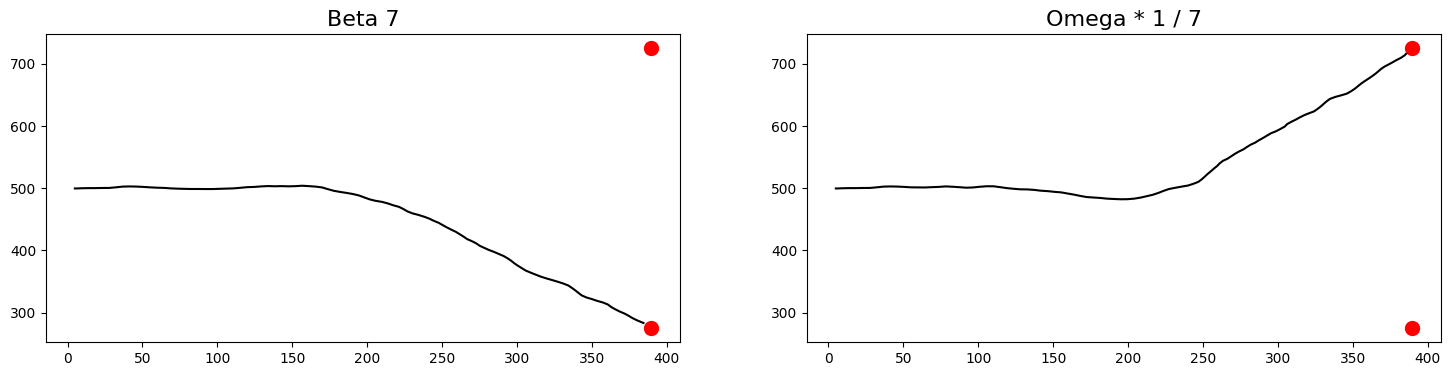

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

#-------------------------------- OMEGA / 7 --------------------------------

df_cen_beta = pd.read_csv('../output/beta_rel_param/centroid_beta7.txt', sep='\t')
df_tar_beta = pd.read_csv('../output/beta_rel_param/targets_beta7.txt', sep='\t')

for i in range(df_cen_beta.replicate.max()+1):
    ax1.plot(df_cen_beta.loc[df_cen_beta.replicate==i,:].x, df_cen_beta.loc[df_cen_beta.replicate==i,:].y, c='black', alpha=1)
    
ax1.scatter(df_tar_beta.loc[df_tar_beta.id==0,:].x, df_tar_beta.loc[df_tar_beta.id==0,:].y, c='r', s=100)
ax1.scatter(df_tar_beta.loc[df_tar_beta.id==1,:].x, df_tar_beta.loc[df_tar_beta.id==1,:].y, c='r', s=100)
ax1.set_title("Beta 7", fontsize=16)

#-------------------------------- BETA 7 --------------------------------

df_cen_rel = pd.read_csv('../output/beta_rel_param/centroid_mul7.txt', sep='\t')
df_tar_rel = pd.read_csv('../output/beta_rel_param/targets_mul7.txt', sep='\t')

for i in range(df_cen_rel.replicate.max()+1):
    ax2.plot(df_cen_rel.loc[df_cen_rel.replicate==i,:].x, df_cen_rel.loc[df_cen_rel.replicate==i,:].y, c='black', alpha=1)
    
ax2.scatter(df_tar_rel.loc[df_tar_rel.id==0,:].x, df_tar_rel.loc[df_tar_rel.id==0,:].y, c='r', s=100)
ax2.scatter(df_tar_rel.loc[df_tar_rel.id==1,:].x, df_tar_rel.loc[df_tar_rel.id==1,:].y, c='r', s=100)
ax2.set_title("Omega * 1 / 7", fontsize=16);

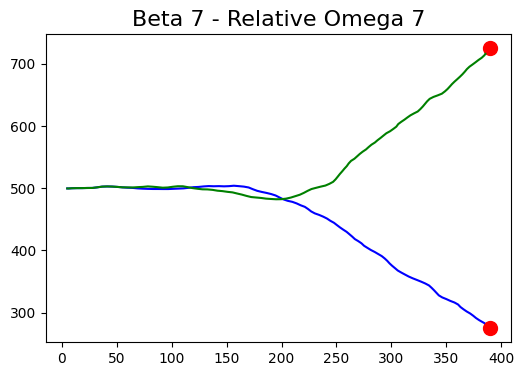

In [12]:
fig, ax = plt.subplots(figsize=(6,4))

#ax.set_xlim(0,300)
#ax.set_ylim(450,520)

df_cen_beta = pd.read_csv('../output/beta_rel_param/centroid_beta7.txt', sep='\t')
df_cen_rel = pd.read_csv('../output/beta_rel_param/centroid_mul7.txt', sep='\t')
df_tar_beta = pd.read_csv('../output/beta_rel_param/targets_beta7.txt', sep='\t')

ax.plot(df_cen_beta.x, df_cen_beta.y, c='b', alpha=1)
ax.plot(df_cen_rel.x, df_cen_rel.y, c='g', alpha=1)
    
ax.scatter(df_tar_beta.loc[df_tar_beta.id==0,:].x, df_tar_beta.loc[df_tar_beta.id==0,:].y, c='r', s=100)
ax.scatter(df_tar_beta.loc[df_tar_beta.id==1,:].x, df_tar_beta.loc[df_tar_beta.id==1,:].y, c='r', s=100)
ax.set_title("Beta 7 - Relative Omega 7", fontsize=16);

No splitting - rel param:	 145
No splitting - beta:		 134


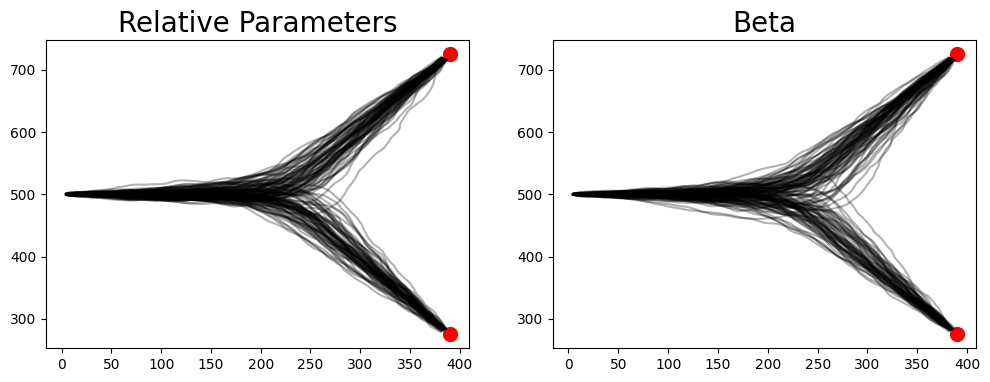

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

#-------------------------------- REL PARAM --------------------------------

df_cen_r = pd.read_csv('../output/beta_rel_param/centroid_rel7_200rep.txt', sep='\t')
df_tar = pd.read_csv('../output/beta_rel_param/targets_rel7_200rep.txt', sep='\t')


num_r = len(df_cen_r[df_cen_r['cue_reached']!=-1])
reached_r = df_cen_r[df_cen_r['cue_reached']!=-1].replicate.head(num_r+1)
df_cen_r = df_cen_r[df_cen_r.replicate.isin(reached_r)]


for i in range(df_cen_r.replicate.max()+1):
    ax1.plot(df_cen_r.loc[df_cen_r.replicate==i,:].x, df_cen_r.loc[df_cen_r.replicate==i,:].y, c='black', alpha=0.3)
ax1.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax1.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax1.set_title("Relative Parameters", fontsize=20)

print("No splitting - rel param:\t", len(df_cen_r[df_cen_r['cue_reached']!=-1]))

#------------------------------- BETA -------------------------------
df_cen_b = pd.read_csv('../output/beta_rel_param/centroid_beta7_200rep.txt', sep='\t')
df_tar = pd.read_csv('../output/beta_rel_param/targets_beta7_200rep.txt', sep='\t')

num_b = len(df_cen_b[df_cen_b['cue_reached']!=-1])
reached_b = df_cen_b[df_cen_b['cue_reached']!=-1].replicate.head(num_b+1)
df_cen_b = df_cen_b[df_cen_b.replicate.isin(reached_b)]


for i in range(df_cen_b.replicate.max()+1):
    ax2.plot(df_cen_b.loc[df_cen_b.replicate==i,:].x, df_cen_b.loc[df_cen_b.replicate==i,:].y, c='black', alpha=0.3)
ax2.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax2.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax2.set_title("Beta", fontsize=20)

print("No splitting - beta:\t\t", len(df_cen_b[df_cen_b['cue_reached']!=-1]))


In [14]:
num_r = len(df_cen_r[df_cen_r['cue_reached']!=-1])
reached_r = df_cen_r[df_cen_r['cue_reached']!=-1].replicate.head(num_r+1)
df_cen_r = df_cen_r[df_cen_r.replicate.isin(reached_r)]
print(bifurcation_point(df_cen_r))


num_b = len(df_cen_b[df_cen_b['cue_reached']!=-1])
reached_b = df_cen_b[df_cen_b['cue_reached']!=-1].replicate.head(num_b+1)
df_cen_b = df_cen_b[df_cen_b.replicate.isin(reached_b)]
print(bifurcation_point(df_cen_b))


221.7242424847823
226.03043976560738


**With the last cells, it is shown how the two approaches lead to the same results.**

---
---
---

I now want to check if the introduction of `beta` parameter changes the bifurcation point.

**Treshold angle = 40 deg**

**Treshold angle = 20 deg**

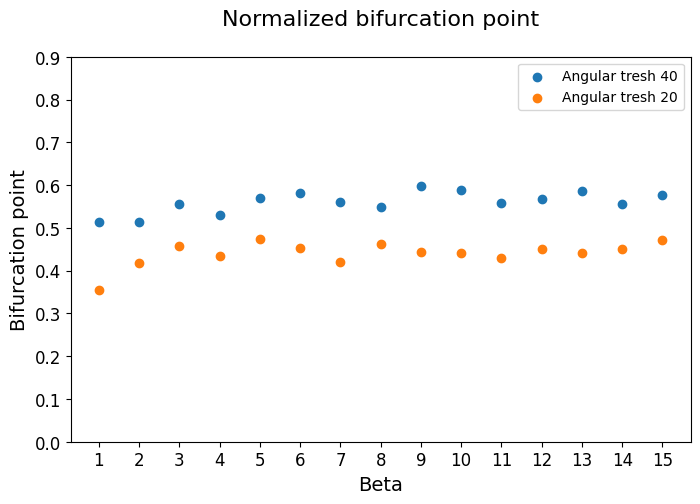

In [15]:
fig, ax = plt.subplots(figsize=(8,5))

beta = []
bif_point =[]

#-------------------------------- ANG TRESH 40 --------------------------------

df_cen = pd.read_csv('../output/bif_point/centroid_b1_deg40.txt', sep='\t')
df_tar = pd.read_csv('../output/bif_point/targets_b1_deg40.txt', sep='\t')
num_max = len(df_cen[df_cen['cue_reached']!=-1].replicate.unique())

for i in range(1,16):
    df_cen = pd.read_csv(f'../output/bif_point/centroid_b{i}_deg40.txt', sep='\t')
    reached = df_cen[df_cen['cue_reached']!=-1].replicate.head(num_max+1)
    df_cen = df_cen[df_cen.replicate.isin(reached)]
    beta.append(i)
    bif_point.append(bifurcation_point(df_cen))
    
bif_point[:] = [x / df_tar.loc[df_tar.id==0,:].x for x in bif_point]
plt.scatter(beta[:], bif_point[:], label = 'Angular tresh 40')
plt.xticks(np.arange(0, 16), size=12)
plt.yticks(np.arange(0, 1, 0.1), size=12)
plt.xlabel('Beta', size=18)
plt.ylabel('Normalized bifurcation point', size=18)

bp1 = np.array(bif_point)

#-------------------------------- ANG TRESH 20 --------------------------------

beta = []
bif_point =[]

for i in range(1,16):
    df_cen = pd.read_csv(f'../output/bif_point/centroid_b{i}_deg20.txt', sep='\t')
    reached = df_cen[df_cen['cue_reached']!=-1].replicate.head(num_max)
    df_cen = df_cen[df_cen.replicate.isin(reached)]
    beta.append(i)
    bif_point.append(bifurcation_point(df_cen))
       
bif_point[:] = [x / df_tar.loc[df_tar.id==0,:].x for x in bif_point]
plt.scatter(beta[:], bif_point[:], label = 'Angular tresh 20')

#plt.xticks(np.arange(0, 16), size=12)
plt.yticks(np.arange(0, 1, 0.1), size=12)
plt.xlabel('Beta', size=14)
plt.ylabel('Bifurcation point', size=14)
plt.title('Normalized bifurcation point\n', size=16)
plt.legend(loc=1)
plt.savefig('../img/bif_point.pdf', format='pdf', dpi=300)

---
---
---

## Negative feedback: forgetting process
We want to explore the role of negative feedbak.

What happens if I delete the positive feedback and mantain all the others parameters?

total_agents:	 60.0 
set_omega:	 0.3 
omega_dec:	 0.0008

no split:	 6


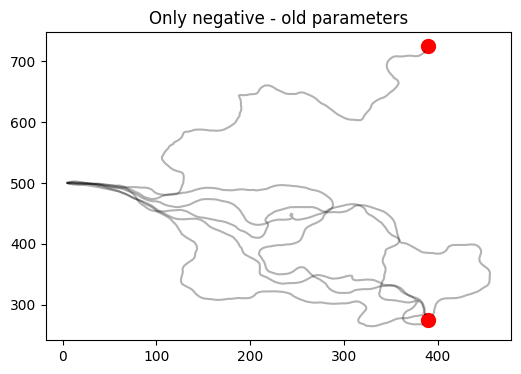

In [16]:
fig, ax = plt.subplots(figsize=(6,4))

param = pd.read_csv('../output/negative_feedback/parameters_onlyneg_oldparam.txt', sep='\t', index_col=False, header=None)
param = param.T
param = param.rename(columns=param.iloc[0]).drop(param.index[0])
print('total_agents:\t', param.total_agents[1], '\nset_omega:\t', param.set_omega[1], '\nomega_dec:\t', param.omega_dec[1])

df_cen = pd.read_csv('../output/negative_feedback/centroid_onlyneg_oldparam.txt', sep='\t')
df_tar = pd.read_csv('../output/negative_feedback/targets_onlyneg_oldparam.txt', sep='\t')
reached = df_cen[df_cen['cue_reached']!=-1].replicate
num = len(df_cen[df_cen['cue_reached']!=-1])
print('\nno split:\t', num)
df_cen = df_cen[df_cen.replicate.isin(reached)]

for i in range(df_cen.replicate.max()+1):
    ax.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
    
ax.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax.set_title('Only negative - old parameters');

If we just **delete the positive feedback** without tuning differently any other parameter the **result is not improved**: just 6 replicates out of 300 reach the target.

We can try to change the other parameters.

total_agents:	 60.0 
set_omega:	 0.3 
omega_dec:	 0.00015

no split:	 153
57.20693001610742


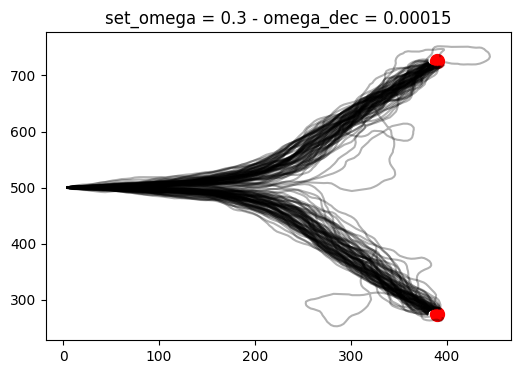

In [17]:
fig, ax = plt.subplots(figsize=(6,4))

param = pd.read_csv('../output/negative_feedback/parameters_setom0,3_dec0,00015.txt', sep='\t', index_col=False, header=None)
param = param.T
param = param.rename(columns=param.iloc[0]).drop(param.index[0])
print('total_agents:\t', param.total_agents[1], '\nset_omega:\t', param.set_omega[1], '\nomega_dec:\t', param.omega_dec[1])

df_cen = pd.read_csv('../output/negative_feedback/centroid_setom0,3_dec0,00015.txt', sep='\t')
df_tar = pd.read_csv('../output/negative_feedback/targets_setom0,3_dec0,00015.txt', sep='\t')
reached = df_cen[df_cen['cue_reached']!=-1].replicate
num = len(df_cen[df_cen['cue_reached']!=-1])
print('\nno split:\t', num)
df_cen = df_cen[df_cen.replicate.isin(reached)]

for i in range(df_cen.replicate.max()+1):
    ax.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
    
ax.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax.set_title('set_omega = 0.3 - omega_dec = 0.00015')
print(bifurcation_point(df_cen));

total_agents:	 60.0 
set_omega:	 0.3 
omega_dec:	 0.0002

no split:	 78
38.45610446832991


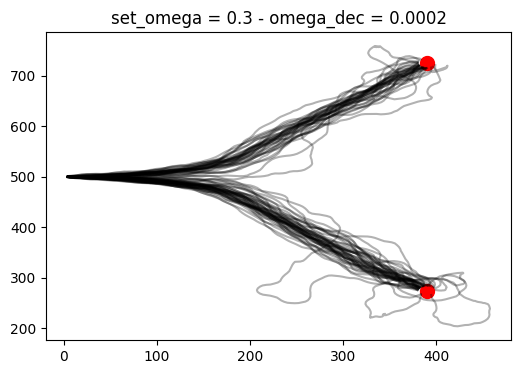

In [18]:
fig, ax = plt.subplots(figsize=(6,4))

param = pd.read_csv('../output/negative_feedback/parameters_setom0,3.txt', sep='\t', index_col=False, header=None)
param = param.T
param = param.rename(columns=param.iloc[0]).drop(param.index[0])
print('total_agents:\t', param.total_agents[1], '\nset_omega:\t', param.set_omega[1], '\nomega_dec:\t', param.omega_dec[1])

df_cen = pd.read_csv('../output/negative_feedback/centroid_setom0,3.txt', sep='\t')
df_tar = pd.read_csv('../output/negative_feedback/targets_setom0,3.txt', sep='\t')
reached = df_cen[df_cen['cue_reached']!=-1].replicate
num = len(df_cen[df_cen['cue_reached']!=-1])
print('\nno split:\t', num)
df_cen = df_cen[df_cen.replicate.isin(reached)]

for i in range(df_cen.replicate.max()+1):
    ax.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
    
ax.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax.set_title('set_omega = 0.3 - omega_dec = 0.0002')
print(bifurcation_point(df_cen));

Tuning the other parameters (`set_omega` and `omega_dec`) allow us to reach our goal. However this changes the bifurcation point with respect at the case with the positive feedback.

total_agents:	 60.0 
set_omega:	 0.6 
omega_dec:	 0.0004

no split:	 100
56.093834661492124


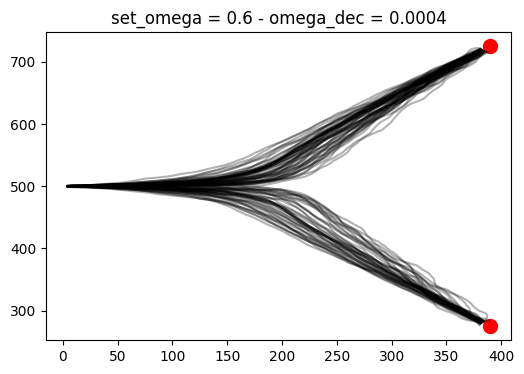

In [19]:
fig, ax = plt.subplots(figsize=(6,4))

param = pd.read_csv('../output/negative_feedback/parameters_setom0,6.txt', sep='\t', index_col=False, header=None)
param = param.T
param = param.rename(columns=param.iloc[0]).drop(param.index[0])
print('total_agents:\t', param.total_agents[1], '\nset_omega:\t', param.set_omega[1], '\nomega_dec:\t', param.omega_dec[1])

df_cen = pd.read_csv('../output/negative_feedback/centroid_setom0,6.txt', sep='\t')
df_tar = pd.read_csv('../output/negative_feedback/targets_setom0,6.txt', sep='\t')
reached = df_cen[df_cen['cue_reached']!=-1].replicate
num = len(df_cen[df_cen['cue_reached']!=-1])
print('\nno split:\t', num)
df_cen = df_cen[df_cen.replicate.isin(reached)]

for i in range(df_cen.replicate.max()+1):
    ax.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
    
ax.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax.set_title('set_omega = 0.6 - omega_dec = 0.0004')
print(bifurcation_point(df_cen));

total_agents:	 60.0 
set_omega:	 0.3 
omega_dec:	 0.0008

no split:	 19
209.80916444847156


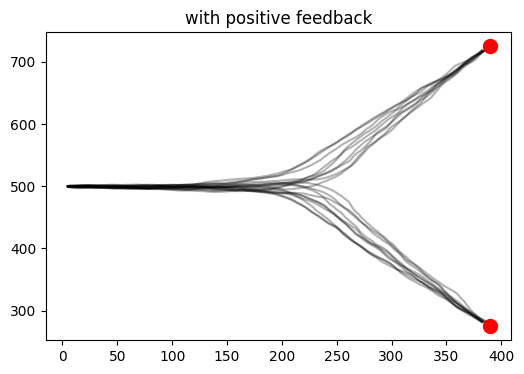

In [20]:
fig, ax = plt.subplots(figsize=(6,4))

param = pd.read_csv('../output/negative_feedback/parameters_posfeed.txt', sep='\t', index_col=False, header=None)
param = param.T
param = param.rename(columns=param.iloc[0]).drop(param.index[0])
print('total_agents:\t', param.total_agents[1], '\nset_omega:\t', param.set_omega[1], '\nomega_dec:\t', param.omega_dec[1])

df_cen = pd.read_csv('../output/negative_feedback/centroid_posfeed.txt', sep='\t')
df_tar = pd.read_csv('../output/negative_feedback/targets_posfeed.txt', sep='\t')
reached = df_cen[df_cen['cue_reached']!=-1].replicate
num = len(df_cen[df_cen['cue_reached']!=-1])
print('\nno split:\t', num)
df_cen = df_cen[df_cen.replicate.isin(reached)]

for i in range(df_cen.replicate.max()+1):
    ax.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.3)
    
ax.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
ax.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax.set_title('with positive feedback')

print(bifurcation_point(df_cen));

The bifurcation point change in a non-trivial way with respect to these parameters: w/wo positive feedback, `set_omega`, `omega_dec`


no split:	 28


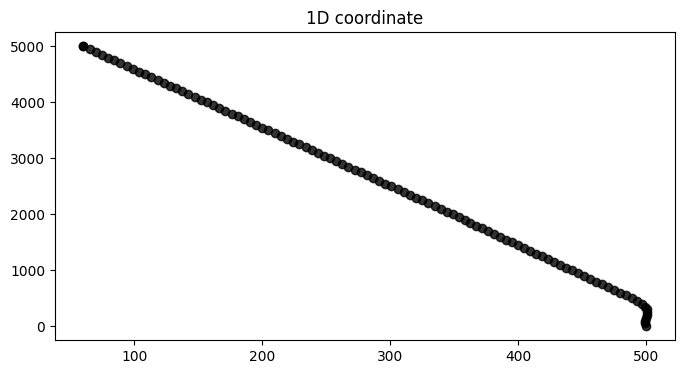

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

#param = pd.read_csv('../output/parameters_1d.txt', sep='\t', index_col=False, header=None)
#param = param.T
#param = param.rename(columns=param.iloc[0]).drop(param.index[0])
#print('total_agents:\t', param.total_agents[1], '\nset_omega:\t', param.set_omega[1], '\nomega_dec:\t', param.omega_dec[1])

df_cen = pd.read_csv('../output/centroid_1d.txt', sep='\t')
df_tar = pd.read_csv('../output/targets_1d.txt', sep='\t')
reached = df_cen[df_cen['cue_reached']!=-1].replicate
num = len(df_cen[df_cen['cue_reached']!=-1])
print('\nno split:\t', num)
df_cen = df_cen[df_cen.replicate.isin(reached)]

ax.scatter(df_cen.loc[df_cen.replicate==0,:].x, df_cen.loc[df_cen.replicate==0,:].time, c='black', alpha=0.8)

#ax.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
#ax.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
ax.set_title('1D coordinate');

#print(bifurcation_point(df_cen));

In [ ]:
# THE GROUP SEEMS TO CHOSE ONE DIRECTION ALMOST AT THE BEGINNING..
# SEE WITH MORE AGENTS - AGENTS ANIMATION

0.39939085249130535